<a href="https://colab.research.google.com/github/degr8sid-code/DataScience-BusinessAnalyticsTask/blob/main/PredictionusingUnsupervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Science and Business Analytics Internship**
## **GRIP @ The Sparks Foundation**
**Task 2: Preduction Using Unsupervised Machine Learning**

In [ ]:
#importing the required files
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#importing classic iris dataset
from sklearn import datasets

# Load the iris dataset
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)

# See the first 5 rows
iris_df.head() 

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


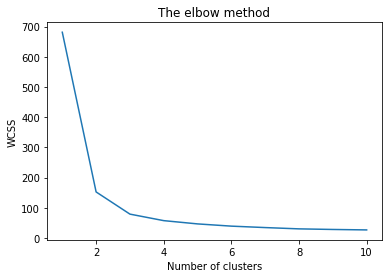

In [ ]:
#Step: Predict the optimum number of clusters
#using the elbow method to find the clusters
x = iris_df.iloc[:, [0, 1, 2, 3]].values

#importing KMeans
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

# Plotting the results onto a line graph, 
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [ ]:
#Training KMeans model on the dataset
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

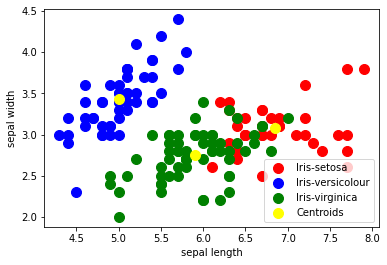

In [ ]:
#visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()

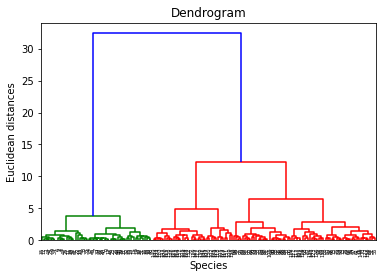

In [ ]:
#Using the dendrogram to find the optimal number of clusters
#dendrogram is a tree diagram that shows taxonomical relationships
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Species')
plt.ylabel('Euclidean distances')
plt.show()

In [ ]:
#Using the Hierarchical Clustering Model on the dataset
#The agglomerative clustering is the most common type of hierarchical clustering used to group objects in clusters based on their similarity.
#Hierarchical clustering is a powerful technique that allows you to build tree structures from data similarities. You can now see how different sub-clusters relate to each other, and how far apart data points are.
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x)

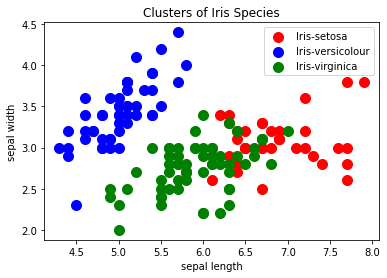

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

plt.title('Clusters of Iris Species')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()